MultiCampus Study Group 2017.01.02

** Python Basic **

[wikidocs](https://wikidocs.net/book/1)

[pythonprogramming.net](https://pythonprogramming.net/)

[sklearn tutorials](http://scikit-learn.org/stable/tutorial/)

[sklearn user guide](http://scikit-learn.org/stable/user_guide.html)


** Visualization : matplotlib, seaborn **

[pandas](pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

[seaborn](http://seaborn.pydata.org/tutorial.html)


** Basic Statistical Analysis Methods **

http://blog.naver.com/PostView.nhn?blogId=y4769&logNo=220024117776

https://www.kevinsheppard.com/images/0/09/Python_introduction.pdf

pandas : http://chrisalbon.com/python/pandas_dataframe_descriptive_stats.html


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris, load_digits
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
st = time.time()

iris = load_iris()
dir(iris)
data = iris.data
target = iris.target

print(type(data))
print(data.shape)
print(target.shape)
print('='*50)

print(round(time.time()-st,4) , 's')

<class 'numpy.ndarray'>
(150, 4)
(150,)
0.0082 s


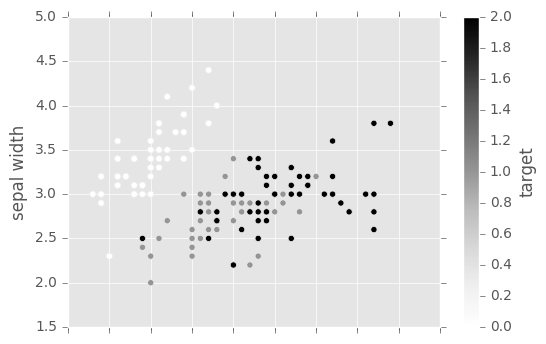

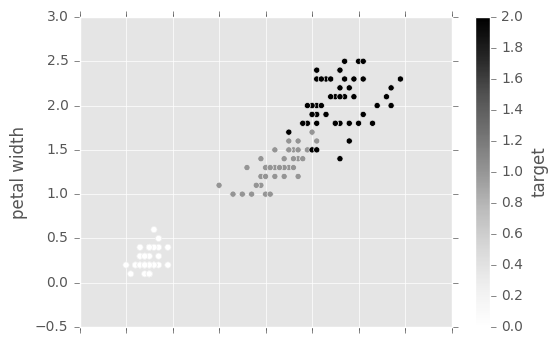

In [3]:
iris_data_df = pd.DataFrame(data)

iris_target_df = pd.DataFrame(target)

iris_data_df.head()
iris_target_df.head()

iris_data_df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_target_df.columns = ['target']

iris_dataset = pd.concat([iris_data_df, iris_target_df], axis=1)
iris_dataset.head()

#iris_dataset.plot()
iris_dataset.plot.scatter(x='sepal length', y='sepal width', c='target')
iris_dataset.plot.scatter(x='petal length', y='petal width', c='target')
#iris_dataset.plot.scatter(x='petal width', y='target',ax=ax2)
#iris_dataset.plot.scatter(x='petal width', y='target',ax=ax3)



In [22]:
# http://www.scipy-lectures.org/packages/statistics/index.html
df = pd.read_csv('brain_size.csv', sep=';', na_values='.')
df.head()
#df.describe()
#df.cov()
#df.corr()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


### Normal distribution Test

In [5]:
# Normal distribution test : Shapiro test
x = np.random.normal(0,1,1000)
print('t-value :' ,stats.shapiro(x)[0])
print('p-value :' ,stats.shapiro(x)[1])

t-value : 0.9980957508087158
p-value : 0.32508584856987


## Categorical Variables

### T test, Wilcoxon, Mannwhitneyu

In [42]:
# 1 Sample test
stats.ttest_1samp(df['VIQ'],0)

# 2 Sample test
stats.ttest_ind(df[df['Gender']=='Female']['VIQ'], df[df['Gender']=='Male']['VIQ'])
stats.ttest_ind(df['VIQ'], df['PIQ'])

#stats.ttest_rel(df['FSIQ'], df['PIQ'])


# fail to Shapiro test
# paired-t test,  Wilcoxon Signed rank test
stats.wilcoxon(df['FSIQ'], df['PIQ'])
# 2 sample test 
stats.mannwhitneyu(df['FSIQ'], df['PIQ'])

MannwhitneyuResult(statistic=695.0, pvalue=0.15715813232063375)

### 1 way-ANOVA, Kruskal-Wallis

In [6]:
stats.f_oneway(df['VIQ'], df['PIQ'], df['FSIQ'])

F_onewayResult(statistic=0.10770937049630455, pvalue=0.89797743814474806)

In [7]:
stats.kruskal(df['VIQ'], df['PIQ'], df['FSIQ'])

KruskalResult(statistic=1.0071719074799006, pvalue=0.60435956387618095)

### Simple Linear Regression

In [11]:
x = [1,2,3,4,5]
y = [2,3,4,5,6]
m, inter, corr_coeffi, two_p_val, stderr\
 = stats.linregress(x,y)
print('r_sqr :', corr_coeffi**2)

r_sqr : 1.0


intercept :  -0.297879140406 
slope :  0.738669668843 
rvalue :  0.346530435889 
pvalue :  0.000412692195895


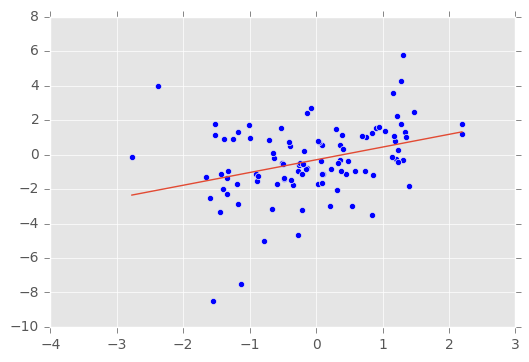

In [36]:
x1 = np.random.randn(100)
x2 = x1 + 2*np.random.randn(100)
x3 = x1 + 0.03*np.random.randn(100)

x, y = x1, x2
reg = stats.linregress(x, y)
print(\
      'intercept : ', reg.intercept,
      '\nslope : ', reg.slope,
      '\nrvalue : ', reg.rvalue,
      '\npvalue : ', reg.pvalue)

xx = np.linspace(x.min(), x.max(), 100)

yy = reg.slope * xx + reg.intercept
plt.scatter(x, y)
plt.plot(xx, yy)
plt.show()


Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


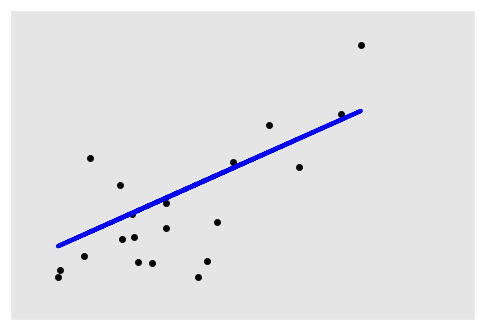

In [6]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

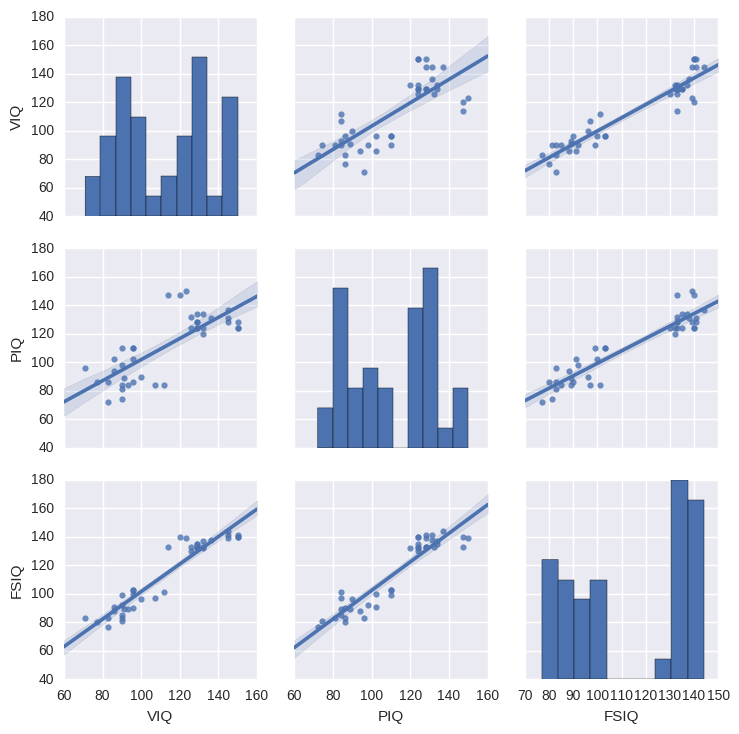

In [19]:
import seaborn as sns; sns.set();
sns.pairplot(df, vars=['VIQ', 'PIQ','FSIQ'], kind='reg')

## Machine learning Pipeline

### 1. Preprocessing

NaN, DataFrame generation

### 2. Feature Engineering
(feature selection)[http://scikit-learn.org/stable/modules/feature_selection.html]

(t-test, 
ANOVA,
ARIMA)

(time series analy.)[http://www.dodomira.com/2016/04/21/r-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%B6%84%EC%84%9D-arima/]


### 3. Model selection - tuning // Hyper parameter tuning
(model selection)[http://scikit-learn.org/stable/model_selection.html
(GridSearchCV, RandomizedSearchCV)
metric, loss, score
R^2, AIC, BIC

### 4. Extract Information


(SVM)[http://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work]

In [1]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.svm import SVC
from sklearn.datasets import load_iris

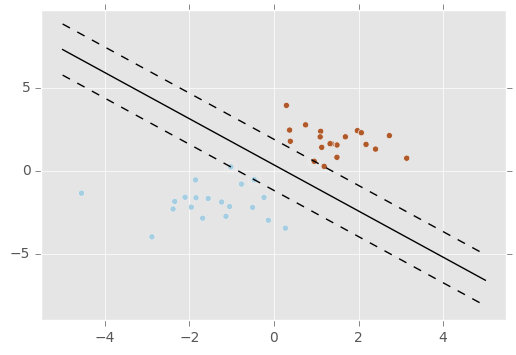

In [8]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [50]:
digits = datasets.load_digits()
y = digits.target
# Throw away data, to be in the curse of dimension settings
y = y[:200]
X = digits.data[:200]
n_samples = len(y)
X = X.reshape((n_samples, -1))
# add 200 non-informative features
X = np.hstack((X, 2 * np.random.random((n_samples, 200))))

In [51]:
transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])

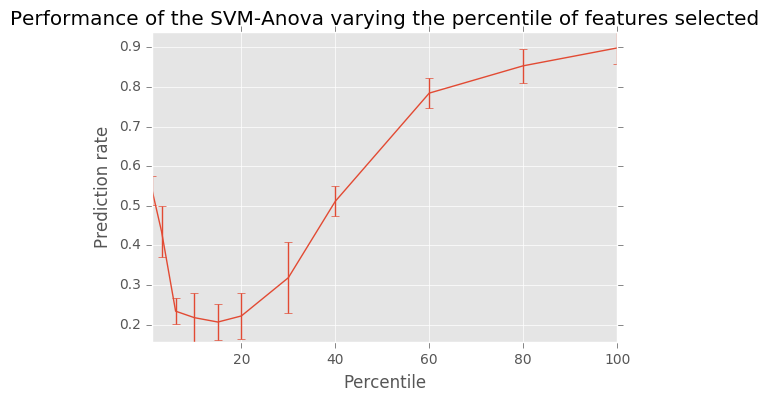

In [52]:
import warnings
warnings.filterwarnings('ignore')

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X, y, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

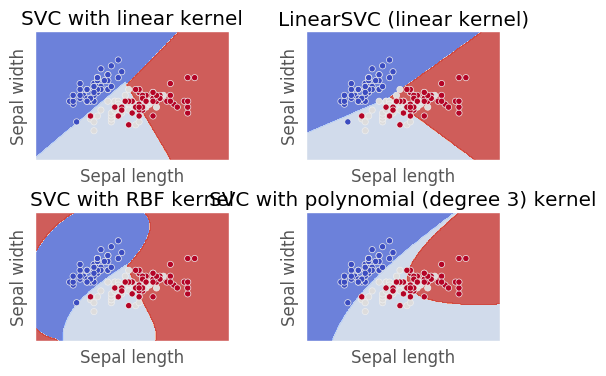

In [46]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()